In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

In [2]:
!pip install seaborn

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\Owner\AppData\Local\pip\Cache\wheels\59\10\63\af632c81af65a5acca29220158270dc767927a81650acffcb5
Successfully built seaborn


In [4]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(normalize=True)
print(model)
print(model.normalize)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
True


[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


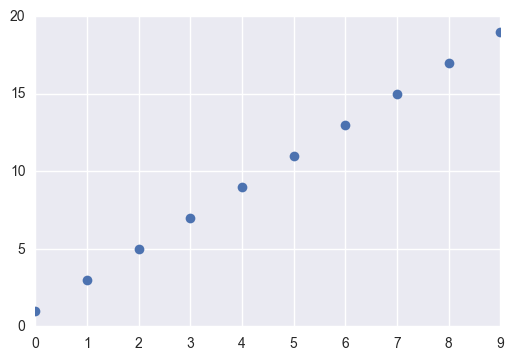

In [10]:
x = np.arange(10)
y = 2 * x + 1
print(x)
print(y)
plt.plot(x, y, 'o');
# The input data for sklearn is 2D: (samples == 3 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

In [11]:
# fit the model on our data
model.fit(X, y)
print(model.coef_)
print(model.intercept_)
#print(model.residues_) is deprecated

[ 2.00000002]
0.999999902313
1.24344969244e-13


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


# Supervised learning is further broken down into two categories, classification and regression. In classification, the label is discrete, while in regression, the label is continuous

['versicolor']


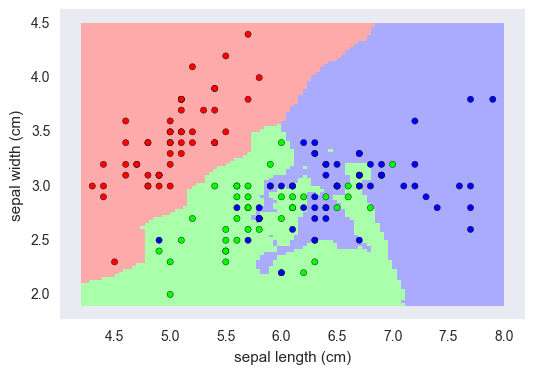

In [13]:
#classification example
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])
knn.predict_proba([[3, 5, 4, 2],])# why ,
from fig_code import plot_iris_knn
plot_iris_knn()

[[ 0.5488135 ]
 [ 0.71518937]
 [ 0.60276338]
 [ 0.54488318]
 [ 0.4236548 ]
 [ 0.64589411]
 [ 0.43758721]
 [ 0.891773  ]
 [ 0.96366276]
 [ 0.38344152]
 [ 0.79172504]
 [ 0.52889492]
 [ 0.56804456]
 [ 0.92559664]
 [ 0.07103606]
 [ 0.0871293 ]
 [ 0.0202184 ]
 [ 0.83261985]
 [ 0.77815675]
 [ 0.87001215]]
[ 5.14051958  3.94040984  4.12135783  2.78055381  0.71797458  4.59130093
  4.17719783  3.93315398  7.16074291  1.69595888  4.42093363  3.39950091
  5.2369129   6.24614868  2.3680556   2.63955042  1.17286944  2.51706307
  3.9865581   4.76638541]


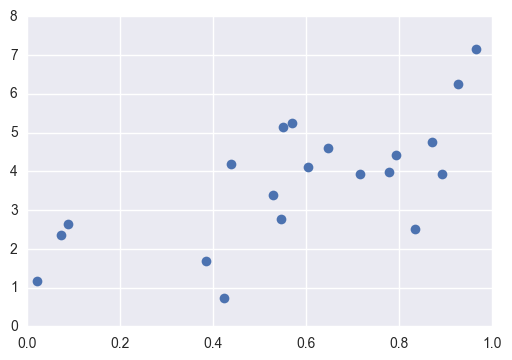

In [15]:
#Regression Example
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
print(X)
y = 3 * X.squeeze() + 2 + np.random.randn(20)
print(y)
plt.plot(X.squeeze(), y, 'o');

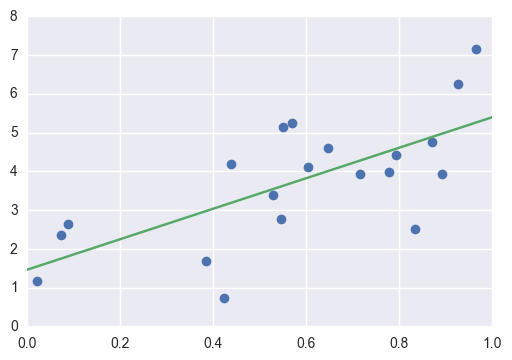

In [17]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)
#點圖
plt.plot(X.squeeze(), y, 'o')
#預測線圖
plt.plot(X_fit.squeeze(), y_fit);

In [31]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
print(model)

ValueError: Number of features of the model must  match the input. Model n_features is 4 and  input n_features is 1 

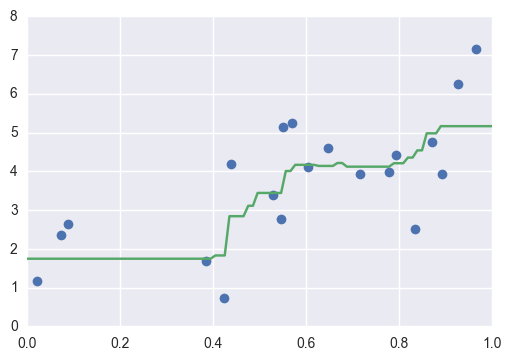

In [24]:
#testing to change hyperparameters(這種class的參數稱作hyperparameter)
model1 = RandomForestRegressor(max_depth=5,min_samples_leaf=3,min_samples_split=4)
model1.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model1.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
#會有一些變化，如何調校參數後續再提

# Unsupervised Learning: Dimensionality Reduction and Clustering

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
[ 0.36158968 -0.08226889  0.85657211  0.35884393]
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
[-0.65653988 -0.72971237  0.1757674   0.07470647]
-0.657 x sepal length (cm) + -0.730 x sepal width (cm) + 0.176 x petal length (cm) + 0.075 x petal width (cm)


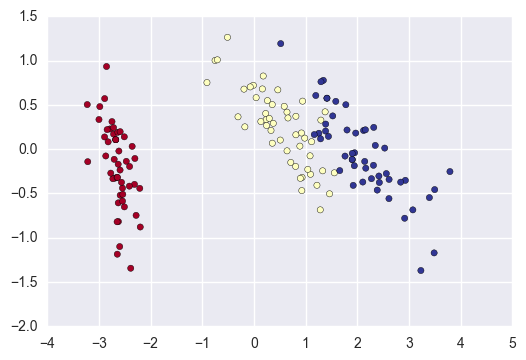

In [30]:
###1.given a mixture of two sound sources (for example, a person talking over some music), 
###separate the two (this is called the blind source separation problem).
#Dimensionality Reduction: PCA
#It cannot be visualized in a single 2D plot, as it has 4 features
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
#還需要把現有資料轉成依據非監督式學習的不同形式
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
#?????????????怎麼有三種顏色????????????
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(component)
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,iris.feature_names)))

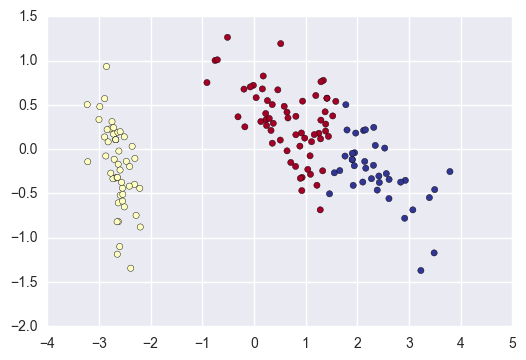

In [33]:
#Clustering: K-means
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

# Model Validation


In [37]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

True
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
[[ 8  0  0]
 [ 0 16  0]
 [ 0  1 13]]


# testing digits data

In [38]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)

(1797, 8, 8)


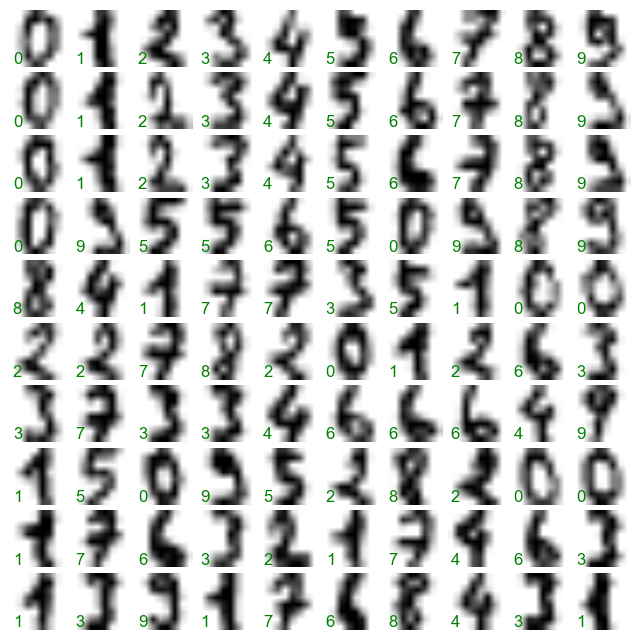

In [39]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])


In [41]:
print(digits.images.shape)
print(digits.images[0])
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])
# The target label
print(digits.target)

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
(1797, 64)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[0 1 2 ..., 8 9 8]


# Unsupervised Learning: Dimensionality Reduction

(1797, 2)


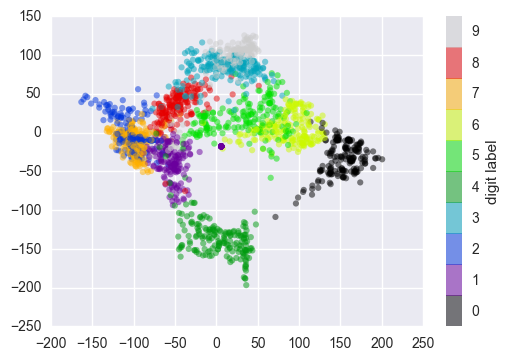

In [42]:
#We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in 64 dimensions! 
#Instead we'll reduce the dimensions to 2, using an unsupervised method
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)
print(data_projected.shape)

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

(1347, 64) (450, 64)
0.946666666667
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


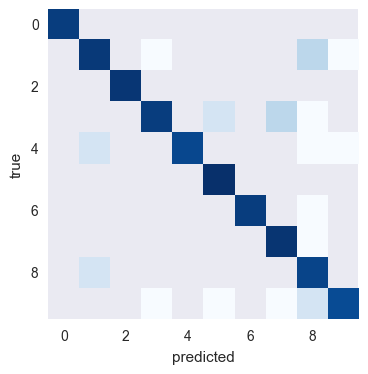

In [46]:
#Classification on Digits
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=2)
print(Xtrain.shape, Xtest.shape)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred))
#accuracy can't tell us where is wrong
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

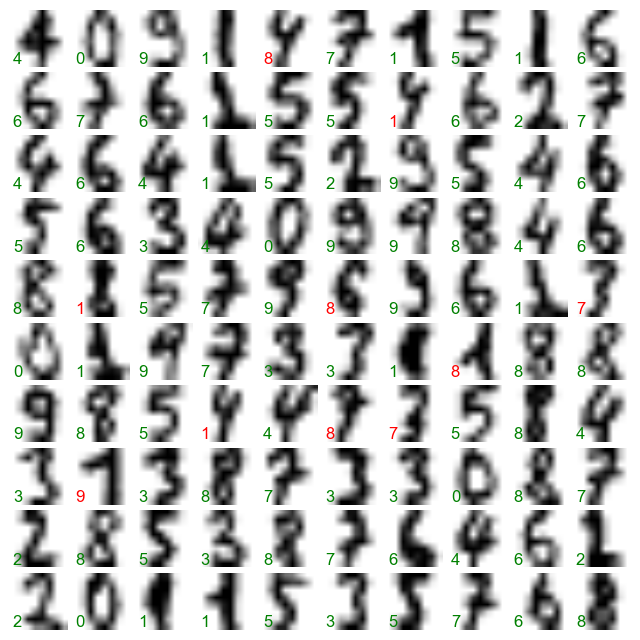

In [47]:

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

# SVM

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

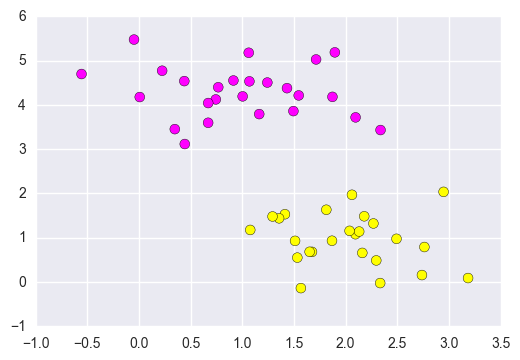

In [49]:
#create fake data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

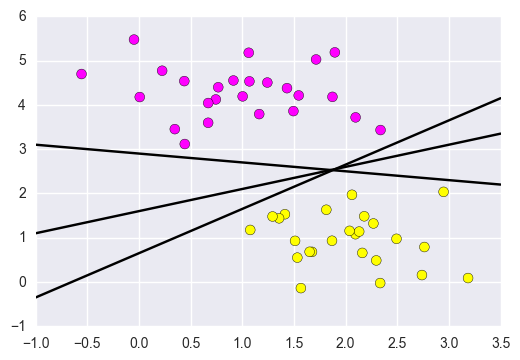

In [50]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

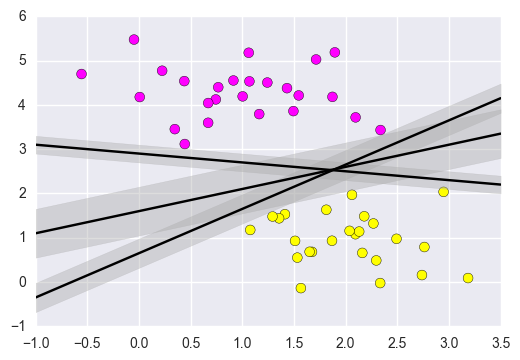

In [51]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

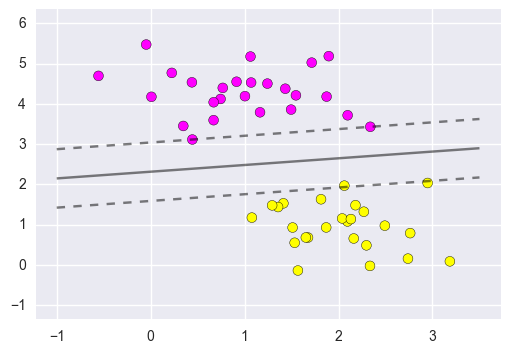

In [52]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);    

[[ 0.44359863  3.11530945]
 [ 2.33812285  3.43116792]
 [ 2.06156753  1.96918596]]


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

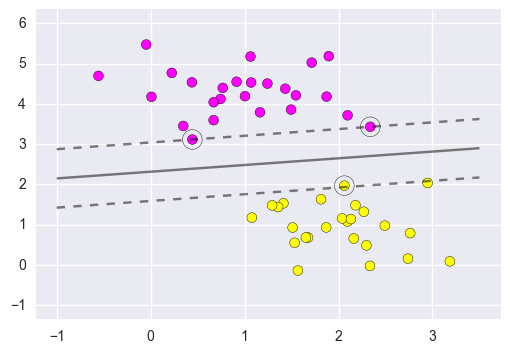

In [54]:
#會印出最貼近margin的幾個點
print(clf.support_vectors_)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

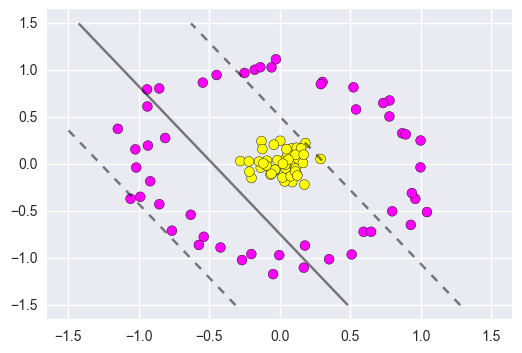

In [57]:
# Kernel Methods
#create simulate data
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

In [61]:
#radial basis function
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

NameError: name 'interact' is not defined

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

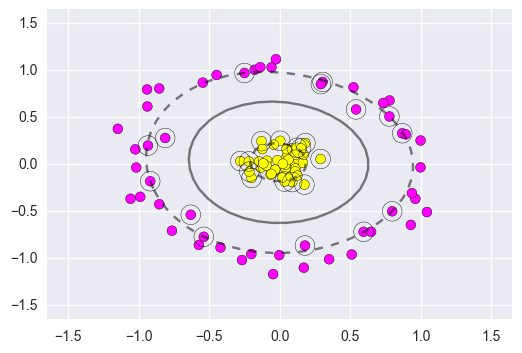

In [60]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

In [2]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
print(log)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
